In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import spatialdata as sd
from spatialdata_io import xenium
from tifffile import TiffFile
from single_cell_vis import find_pixelsize_from_image, plot_cells_by_par
import pandas as pd

In [2]:
path_to_Xenium_folder = '/nfs/team283_imaging/0XeniumExports/AA_ASD/20230710__AA_ASD_foetal_Hs_brain_SFARI_1R2/output-XETG00055__0003394__Hob7-BRA-3_frontal__20230710__174614'


In [4]:
#download dataset as sptaialdata object (may take ~5 min, but you do it only once, to not reopen it again)
sdata = xenium(path_to_Xenium_folder)
sdata 

INFO     reading                                                                                                   
         /nfs/team283_imaging/0XeniumExports/AA_ASD/20230710__AA_ASD_foetal_Hs_brain_SFARI_1R2/output-XETG00055__00
         03394__Hob7-BRA-3_frontal__20230710__174614/cell_feature_matrix.h5                                        


/tmp/ipykernel_7699/382315610.py:2: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  sdata = xenium(path_to_Xenium_folder)


SpatialData object
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 91787, 51292), (1, 45893, 25646), (1, 22946, 12823), (1, 11473, 6411), (1, 5736, 3205)
│     └── 'morphology_mip': DataTree[cyx] (1, 91787, 51292), (1, 45893, 25646), (1, 22946, 12823), (1, 11473, 6411), (1, 5736, 3205)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (91787, 51292), (45893, 25646), (22946, 12823), (11473, 6411), (5736, 3205)
│     └── 'nucleus_labels': DataTree[yx] (91787, 51292), (45893, 25646), (22946, 12823), (11473, 6411), (5736, 3205)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (1563641, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (1563641, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (1563641, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (1563641, 310)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (Images

In [6]:
# download all transcripts (it may also take ~5 minutes, but it will save time for future process)
transcripts = sdata.points['transcripts'].compute()
transcripts

,x,y,z,feature_name,cell_id,qv,nucleus_distance,transcript_id,fov_name,overlaps_nucleus
0,7828.599121,17783.609375,58.177044,LMO3,cpgnddkb-1,40.000000,0.000000,281492156579848,AA14,0
1,7829.794434,17959.912109,59.108242,COPA,cpejhacb-1,16.531847,0.000000,281492156579849,AA14,0
2,7829.919434,17893.292969,59.015179,HNRNPD,cpgdicpo-1,40.000000,0.000000,281492156579851,AA14,1
3,7829.890625,17698.169922,58.697445,ZMYM2,bmijhhgk-1,32.134388,10.732857,281492156579856,AA14,0
4,7830.828125,17876.113281,56.864586,HNRNPD,cpgdaoin-1,40.000000,0.191168,281492156579859,AA14,1
...,...,...,...,...,...,...,...,...,...,...
1174483,7849.117188,17002.632812,60.999489,MARCKSL1,bmimincj-1,40.000000,0.000000,283145719301088,Z13,1
1174484,7848.675781,16695.082031,68.667915,STMN2,oblhjhfh-1,18.840181,0.000000,283145719301089,Z13,1
1174485,7848.248535,17273.089844,60.986042,COPA,bmheklbd-1,40.000000,0.000000,283145719301090,Z13,1
1174486,7849.508789,16914.390625,60.499321,STMN2,bminnddh-1,40.000000,2.261946,283145719301091,Z13,0


In [47]:
sdata.tables['table'].obs

,cell_id,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,total_counts,cell_area,nucleus_area,region,cell_labels
0,aaaaaaok-1,25,0,0,0,25,1245.725469,74.869062,cell_circles,1
1,aaaaabml-1,9,0,0,0,9,267.866875,7.270156,cell_circles,2
2,aaaaakod-1,12,0,0,0,12,454.452500,55.813125,cell_circles,3
3,aaaabfah-1,24,0,0,0,24,451.020625,15.127344,cell_circles,4
4,aaaablhf-1,16,0,0,0,16,264.435000,7.857188,cell_circles,5
...,...,...,...,...,...,...,...,...,...,...
1563636,oiliddhb-1,10,0,0,0,10,1086.910938,44.433750,cell_circles,1563637
1563637,oilidplj-1,13,0,0,0,13,1049.024844,33.325313,cell_circles,1563638
1563638,oiliecnd-1,41,0,0,0,41,980.206719,22.081406,cell_circles,1563639
1563639,oiliegdb-1,9,0,0,0,9,1009.422813,29.938594,cell_circles,1563640


In [26]:
# you have to find pixel size (I cant find it easily in spatial data object, so use directly from image metadata)

pixelsize = find_pixelsize_from_image(path_to_Xenium_folder)
pixelsize

0.2125

Preparation and filtering


/nfs/team283_imaging/playground_Stas/Xenium/cell_visualisation_1024/single_cell_vis.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_transcripts.groupby('feature_name').size()


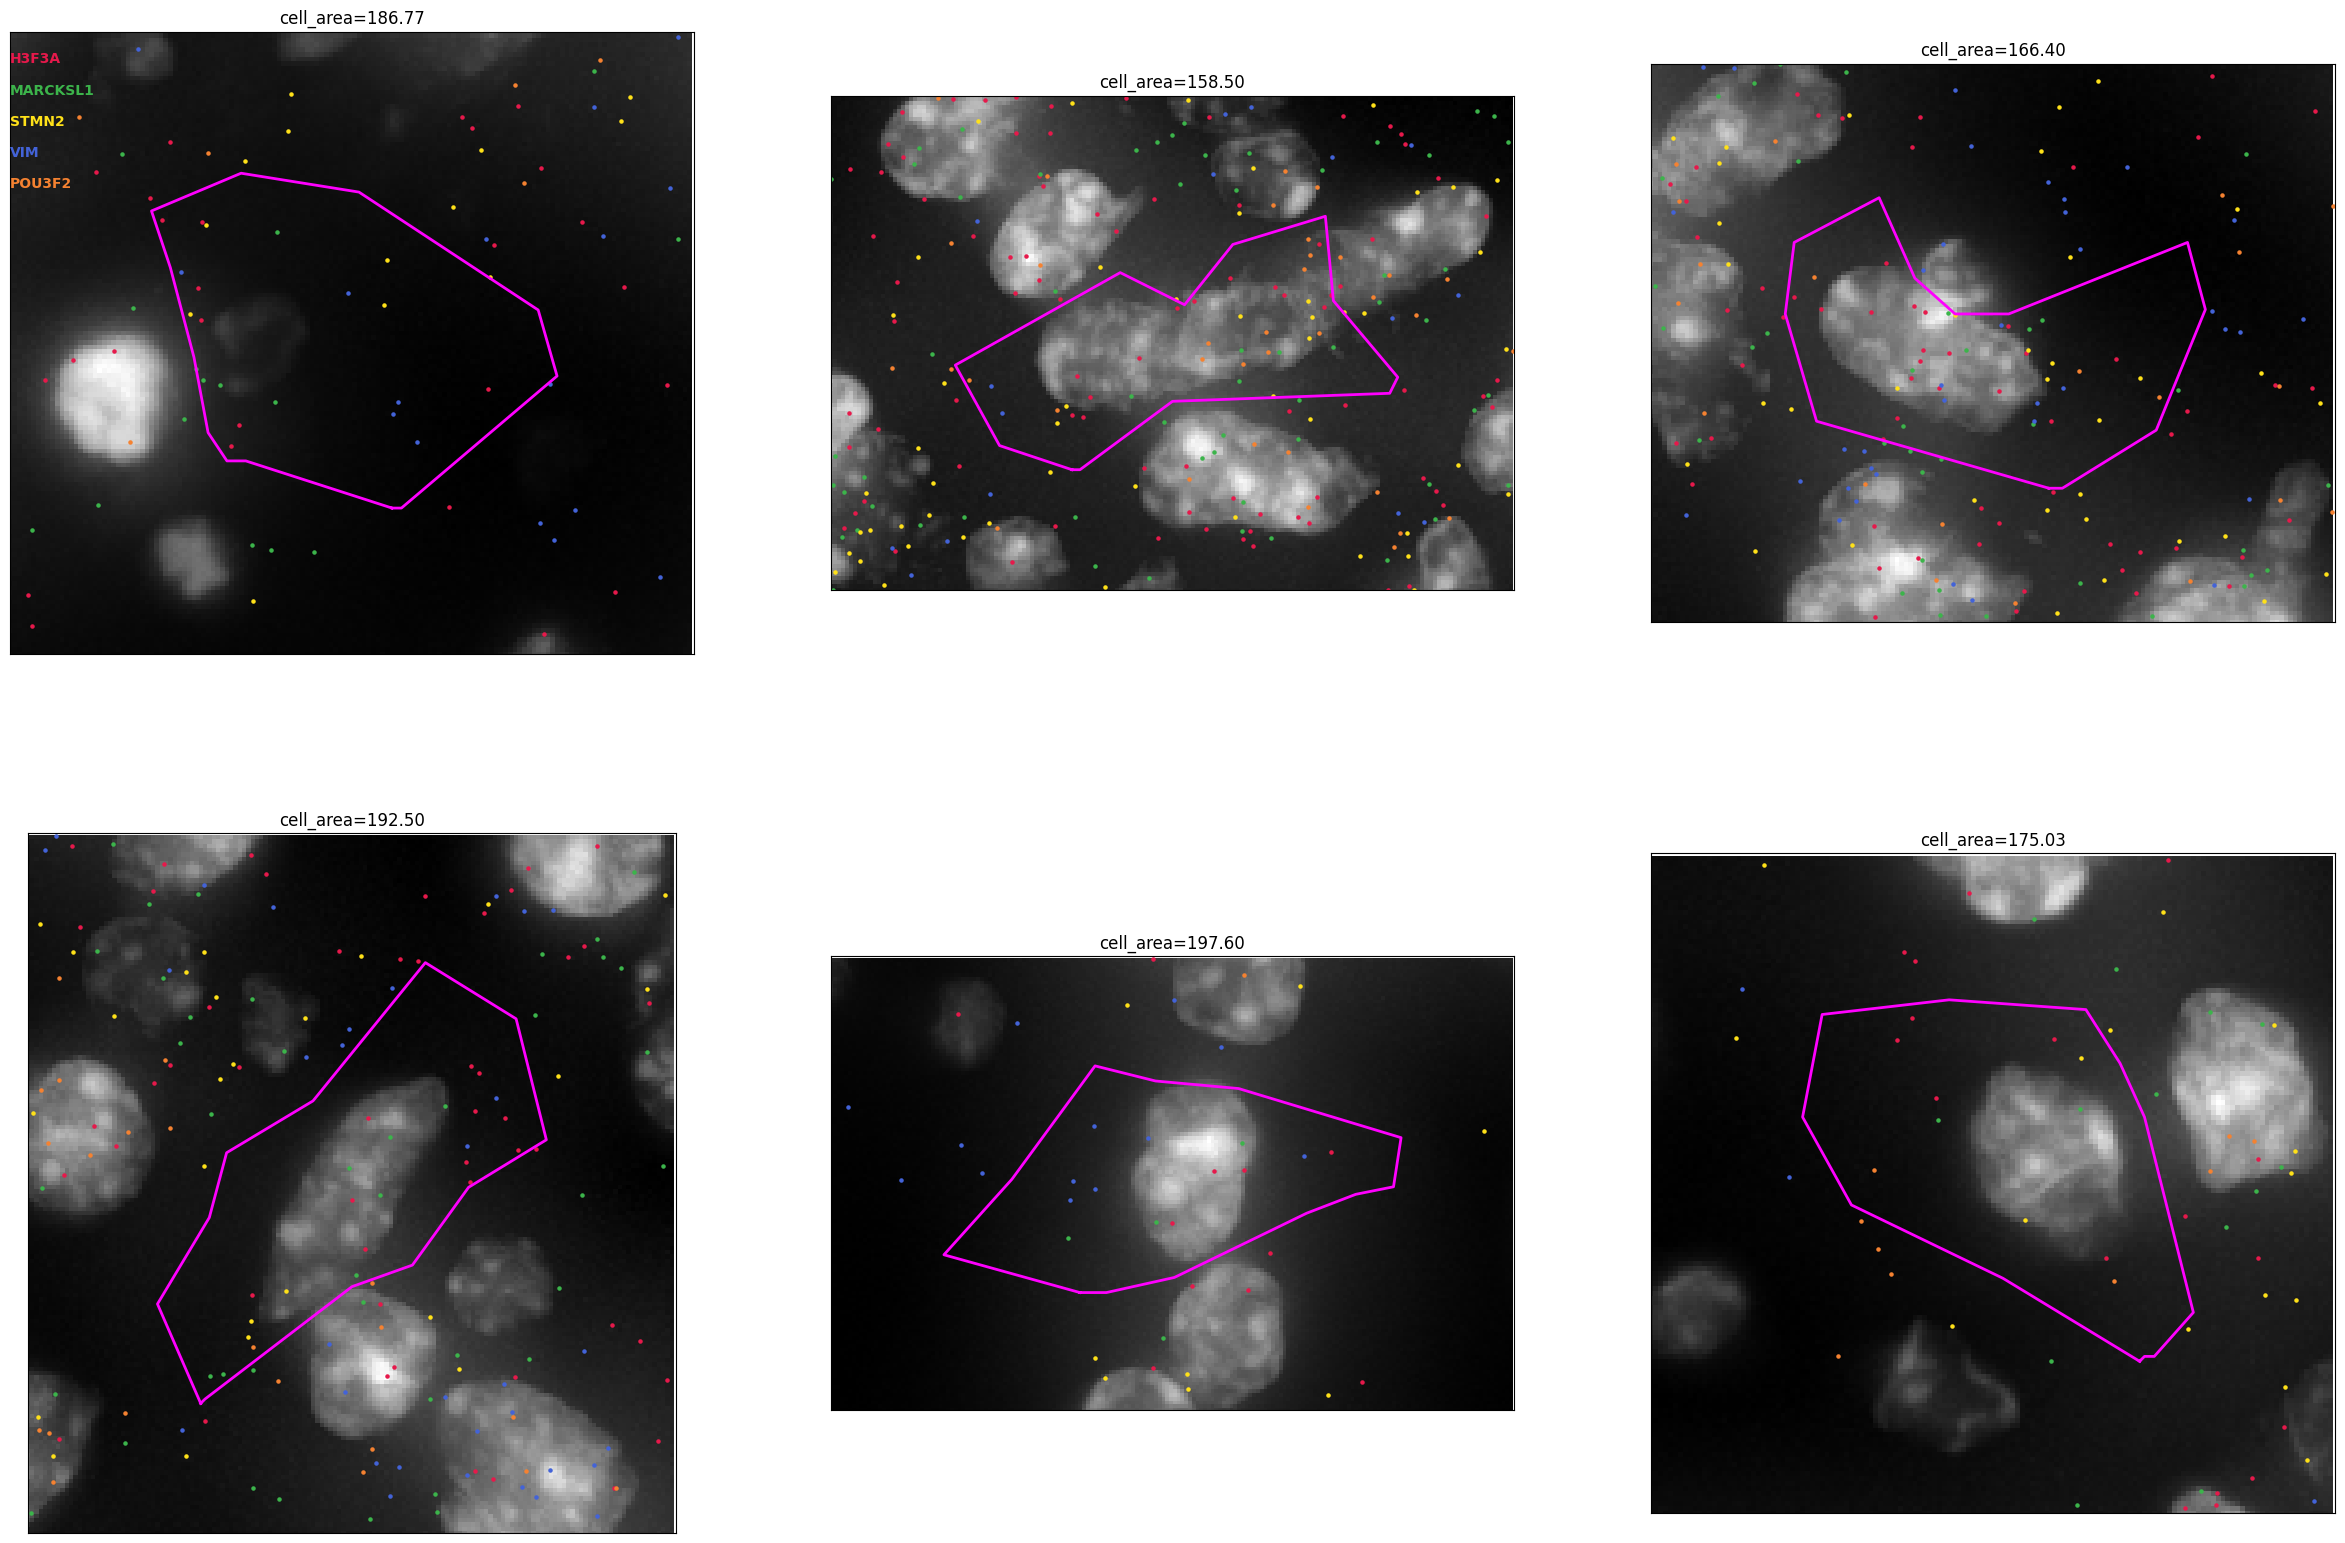

In [59]:
#lets plot random 6 cells (3x2) from area filtering 
plot_cells_by_par(sdata, n_hor = 3, n_vert = 2, col_name = 'cell_area', min_value = 150, max_value = 200, transcripts_all = transcripts, pixelsize = pixelsize, border_size_px=30, save = 'area_filt.png')

In [85]:
# OK, I have cell types defined for this cells, but they are in another csv. What should I do?
#firstly upload this csv
cell_types = pd.read_csv('cell_types.csv')
cell_types

,cell_id,cell_type
0,aaaaaaok-1,TypeA
1,aaaaabml-1,TypeB
2,aaaaakod-1,TypeA
3,aaaabfah-1,TypeA
4,aaaablhf-1,TypeC
...,...,...
1048570,jmdpkafi-1,TypeC
1048571,jmdplkpb-1,TypeB
1048572,jmdpmmea-1,TypeA
1048573,jmdpmohp-1,TypeC


In [86]:
# merge them into the adata.obs table and run the visualisation code
sdata.tables['table'].obs = pd.merge(sdata.tables['table'].obs, cell_types, on='cell_id', how='outer')
sdata.tables['table'].obs

,cell_id,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,total_counts,cell_area,nucleus_area,region,cell_labels,cell_type
0,aaaaaaok-1,25,0,0,0,25,1245.725469,74.869062,cell_circles,1,TypeA
1,aaaaabml-1,9,0,0,0,9,267.866875,7.270156,cell_circles,2,TypeB
2,aaaaakod-1,12,0,0,0,12,454.452500,55.813125,cell_circles,3,TypeA
3,aaaabfah-1,24,0,0,0,24,451.020625,15.127344,cell_circles,4,TypeA
4,aaaablhf-1,16,0,0,0,16,264.435000,7.857188,cell_circles,5,TypeC
...,...,...,...,...,...,...,...,...,...,...,...
1563636,oiliddhb-1,10,0,0,0,10,1086.910938,44.433750,cell_circles,1563637,NaN
1563637,oilidplj-1,13,0,0,0,13,1049.024844,33.325313,cell_circles,1563638,NaN
1563638,oiliecnd-1,41,0,0,0,41,980.206719,22.081406,cell_circles,1563639,NaN
1563639,oiliegdb-1,9,0,0,0,9,1009.422813,29.938594,cell_circles,1563640,NaN


In [ ]:
# run visualisation based on a new column
plot_cells_by_par(sdata, n_hor = 2, n_vert = 2, col_name = 'cell_type', min_value = 'TypeB', max_value = 'TypeB', transcripts_all = transcripts, pixelsize = pixelsize, save = 'cell_type.png', label_col = 'cyan', label_width = 4)

Preparation and filtering


/nfs/team283_imaging/playground_Stas/Xenium/cell_visualisation_1024/single_cell_vis.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  def determine_top_5_genes(df_transcripts):
